In [139]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import joblib


In [140]:
df = pd.read_csv("salary_data.csv")
df.head()


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [142]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [143]:
df.shape

(375, 6)

In [144]:
df.columns


Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [145]:
df.dtypes


Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [146]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [147]:
df_cleaned = df.dropna()

In [148]:
df_cleaned.duplicated().sum()

np.int64(49)

In [149]:
df_cleaned[df.duplicated()]


/var/folders/bd/m8wphbrn0dgbjf_jwlvd99700000gn/T/ipykernel_53822/1933774369.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned[df.duplicated()]


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
250,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
251,38.0,Male,Master's,Senior IT Consultant,9.0,110000.0
252,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0
254,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
255,44.0,Male,Bachelor's,Senior Software Engineer,14.0,130000.0
256,34.0,Female,Master's,Senior Financial Advisor,6.0,100000.0
257,35.0,Male,Bachelor's,Senior Project Coordinator,9.0,95000.0
258,50.0,Female,PhD,Director of Operations,22.0,180000.0


In [150]:
df_cleaned = df.drop_duplicates()


In [151]:
df_cleaned.duplicated().sum()


np.int64(0)

In [152]:
df_cleaned[df_cleaned.isnull().all(axis=1)]


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
df_cleaned = df_cleaned.dropna(how='all')


In [154]:
df_cleaned.isnull().sum()


Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [155]:
df_cleaned.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [156]:
print(df_cleaned.columns)


Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')


Salary Distribution

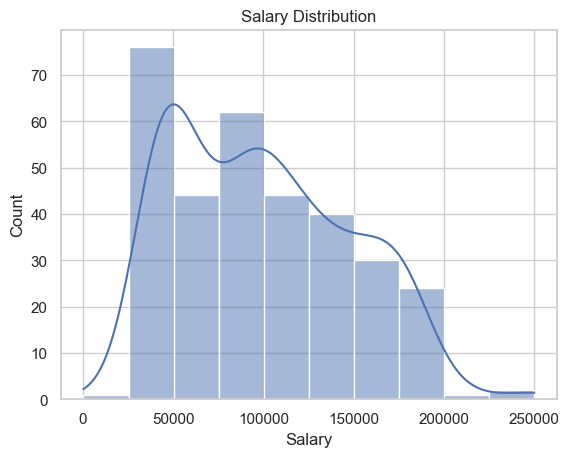

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=df_cleaned, x="Salary", bins=10, kde=True)
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.show()


Relationship between Experience and Salary

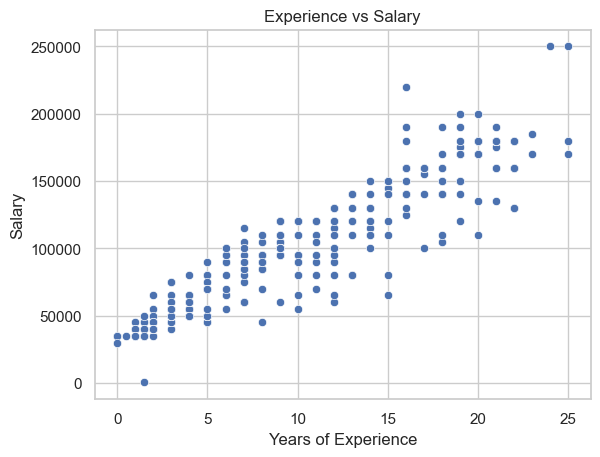

In [158]:
# Optional: Set a clean style
sns.set(style="whitegrid")

# Scatter plot
sns.scatterplot(data=df_cleaned, x="Years of Experience", y="Salary")
plt.title("Experience vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()


Histogram of Experience

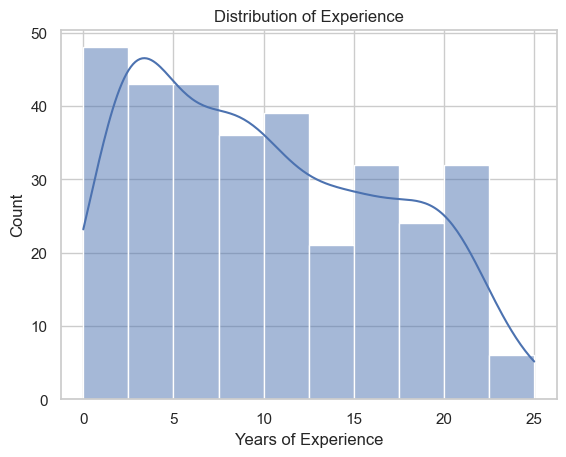

In [159]:
sns.histplot(df_cleaned["Years of Experience"], bins=10, kde=True)
plt.title("Distribution of Experience")
plt.xlabel("Years of Experience")
plt.show()


Boxplot – Detect outliers

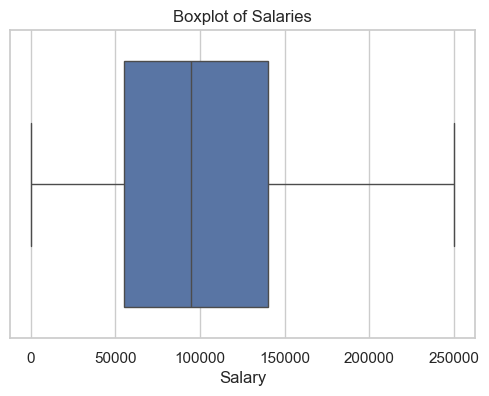

In [160]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_cleaned["Salary"])
plt.title("Boxplot of Salaries")
plt.show()


Modeling & Prediction

In [161]:
X = df_cleaned[["Years of Experience"]]  # input
y = df_cleaned["Salary"]                 # target


In [162]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [163]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [164]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

# Evaluation metrics
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error (MSE): 283179356.6089003
R² Score: 0.8501527636347851


In [165]:
import numpy as np
rmse = np.sqrt(283179356.6089003)
print("RMSE:", rmse)


RMSE: 16827.933818769918


Model is off by about ±16K
So if the true salary is $75,000, the model might predict anywhere from:

$75,000 ± $16,822 → Between $58,178 and $91,822

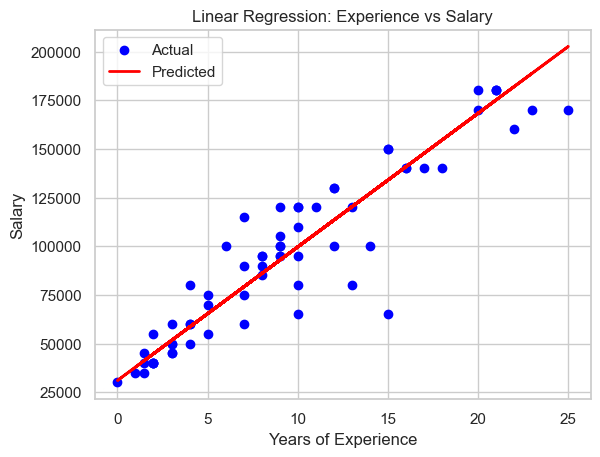

In [166]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Predicted")
plt.title("Linear Regression: Experience vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()


Polynomial Regression


In [167]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

model_poly = LinearRegression()
model_poly.fit(X_poly, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [168]:
X_test_poly = poly.transform(X_test)
y_pred_poly = model_poly.predict(X_test_poly)


In [169]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)

print("Polynomial Regression MSE:", mse_poly)
print("Polynomial Regression RMSE:", rmse_poly)
print("Polynomial Regression R²:", r2_poly)


Polynomial Regression MSE: 276664599.635799
Polynomial Regression RMSE: 16633.23779772895
Polynomial Regression R²: 0.8536001135394552


/Users/november/Documents/Data Science Projects/fair‑pay‑oracle/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


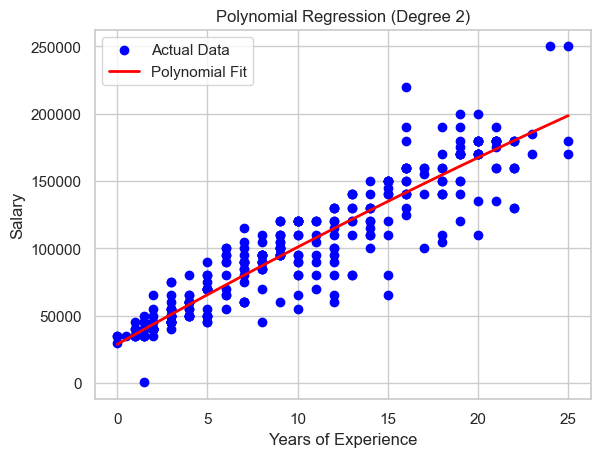

In [170]:
import matplotlib.pyplot as plt
import numpy as np

# Create a smooth curve from min to max of X
X_range = np.linspace(X.min(), X.max(), 100)
X_range_poly = poly.transform(X_range.reshape(-1, 1))
y_range_pred = model_poly.predict(X_range_poly)

# Plot actual points
plt.scatter(X, y, color='blue', label='Actual Data')

# Plot regression curve
plt.plot(X_range, y_range_pred, color='red', linewidth=2, label='Polynomial Fit')

plt.title("Polynomial Regression (Degree 2)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()
